## k-Nearest Neighbors (KNN) Algorithm

The k-Nearest Neighbors (KNN) algorithm is a non-parametric, instance-based
learning method widely used for classification problems. Unlike parametric
models such as linear or logistic regression, KNN does not assume any specific
functional form for the decision boundary. Instead, it makes predictions
directly based on the similarity between data points.

Given a new observation, KNN identifies the $k$ closest samples in the training
dataset according to a predefined distance metric. The class label is then
assigned by majority voting among these nearest neighbors.

Because KNN relies entirely on the training data at prediction time, it is
often referred to as a *lazy learning* algorithm. While this allows KNN to model
complex, nonlinear decision boundaries, it also makes the algorithm sensitive
to the choice of distance metric, feature scaling, and the value of $k$.


### Distance Metrics

The notion of similarity in KNN is defined through a distance metric.
Commonly used distance measures include:

- **Euclidean distance**

$$\large d(\mathbf{x}, \mathbf{x}') = \sqrt{\sum_{j=1}^{p}(x_j - x'_j)^2}$$

- **Manhattan distance**

$$\large d(\mathbf{x}, \mathbf{x}') = \sum_{j=1}^{p} |x_j - x'_j|$$


The choice of distance metric can significantly affect the classification
results, especially when features have different scales or distributions.


### Choice of the Number of Neighbors $k$

The parameter $k$ controls the bias–variance trade-off of the KNN classifier:

- A **small value of $k$** (e.g., $k=1$) leads to low bias but high variance,
  making the model sensitive to noise.
- A **large value of $k$** produces smoother decision boundaries with higher
  bias but lower variance.

Selecting an appropriate value of $k$ is therefore critical for achieving good
generalization performance.


### Advantages and Limitations

**Advantages**
- Simple and intuitive to understand
- No explicit training phase
- Capable of modeling complex, nonlinear decision boundaries

**Limitations**
- Computationally expensive for large datasets
- Sensitive to feature scaling
- Performance degrades in high-dimensional spaces (curse of dimensionality)


## Data Loading

In this section, we load the real-world dataset obtained from Kaggle.
The dataset contains numerical features and a binary class label, which
makes it suitable for applying the k-Nearest Neighbors classifier.

We begin by loading the data and examining its basic structure.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from rice_ml.knn import KNNClassifier

# Load the dataset
df = pd.read_csv("D:/研究生/机器学习/INDE-577/ml_project/examples/data/KNN_data.csv")

# Display the first few rows
df.head()



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Dataset Overview

We inspect the dataset to understand the feature structure, data types,
and the presence of any missing values.


In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


From the dataset overview, we observe that all features are numerical,
which is ideal for distance-based algorithms such as KNN. In the next
step, we will identify the target variable and perform data preprocessing,
including feature scaling, which is crucial for KNN performance.


## Data Preprocessing

Before training the KNN classifier, several preprocessing steps are required.
Since KNN is a distance-based algorithm, the scale of the features directly
affects the distance computation. Therefore, feature scaling is a crucial step
in this workflow.

In this section, we identify the target variable, construct the feature matrix,
and apply standardization to ensure that all features contribute equally to the
distance calculation.


### Target Variable

The target variable in this dataset is the `diagnosis` column, which indicates
whether a tumor is malignant (M) or benign (B). For modeling purposes, we encode
the labels as binary values:
- Malignant (M) → 1  
- Benign (B) → 0


In [3]:
# Encode target variable
y = df["diagnosis"].map({"M": 1, "B": 0}).values

# Drop non-feature columns
X = df.drop(columns=["id", "diagnosis", "Unnamed: 32"], errors="ignore").values

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (569, 30)
Target vector shape: (569,)


### Feature Scaling

KNN relies on distance calculations between data points. If features are on
different scales, variables with larger numerical ranges will dominate the
distance metric.

To address this issue, we standardize the features so that each feature has
zero mean and unit variance.


In [4]:
# Standardization (Z-score normalization)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

X_scaled = (X - X_mean) / X_std


### Train-Test Split

To evaluate the performance of the KNN classifier, we split the dataset into
training and testing subsets.


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 455
Testing samples: 114


## Model Training

In this section, we train the KNN classifier using the preprocessed training
data. We first select a fixed number of neighbors and evaluate the classification
performance on the test set.


In [6]:
# Initialize KNN model
knn = KNNClassifier(k=5, metric="euclidean")

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

y_pred[:10]


array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

### Model Evaluation

To assess the performance of the classifier, we compute the classification
accuracy, defined as the proportion of correctly classified samples.


In [7]:
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9474


The KNN classifier achieves a high classification accuracy on the test set,
indicating that the feature representations are informative and that the
distance-based approach is effective for this dataset.


## Effect of the Number of Neighbors $k$

The number of neighbors $k$ is a key hyperparameter in the KNN algorithm.
Different values of $k$ can lead to significantly different classification
performance.

In this section, we evaluate the effect of varying $k$ on the test accuracy
while keeping all other settings fixed.


In [8]:
k_values = range(1, 22, 2)  # odd k values to avoid ties
accuracies = []

for k in k_values:
    knn = KNNClassifier(k=k, metric="euclidean")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = np.mean(y_pred == y_test)
    accuracies.append(acc)

accuracies


[0.9385964912280702,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9649122807017544,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315]

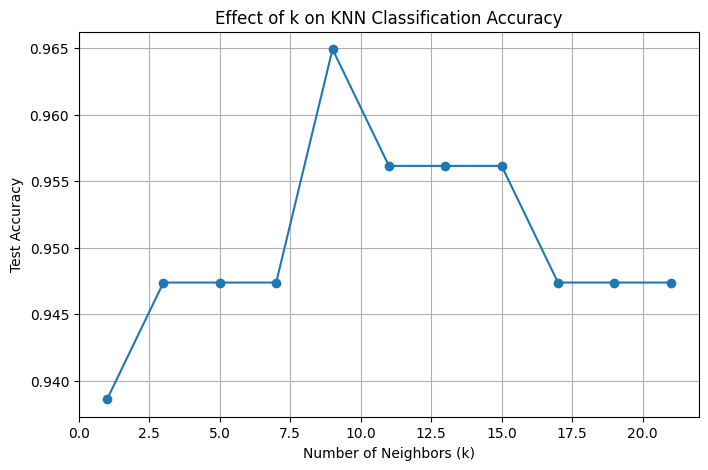

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Test Accuracy")
plt.title("Effect of k on KNN Classification Accuracy")
plt.grid(True)
plt.show()


From the plot above, we observe that the classification accuracy varies with
the choice of $k$. Very small values of $k$ tend to produce more variable
performance due to sensitivity to noise, while larger values of $k$ result
in smoother decision boundaries.

An intermediate value of $k$ achieves the best balance between bias and
variance, leading to the highest test accuracy.


### Summary

The experimental results demonstrate that the classification performance of
the KNN algorithm is sensitive to the choice of the number of neighbors $k$.

When $k$ is very small, the model tends to be more sensitive to noise, resulting
in slightly lower accuracy. As $k$ increases, the accuracy improves and reaches
its peak at an intermediate value of $k$ (around $k = 9$ in this experiment),
where the model achieves the best balance between bias and variance.

For larger values of $k$, the performance gradually decreases, as the decision
boundary becomes overly smooth and local structure in the data is lost. These
results are consistent with the theoretical bias–variance trade-off of the KNN
classifier.
